In [77]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(employee_df.columns.tolist())

['Unnamed: 0', 'Name', 'Role', 'Location', 'Years of Experience', 'Active?', 'Current Comp (INR)', 'Last Working Day']


In [4]:
# Read data using header at row 2 (header=1).
employee_df = pd.read_excel("data/Spaulding_Ridge_Case_Study_1.xlsx", 
                            sheet_name="Employee Data", 
                            header=1)

# By Dropping the unwanted 'Unnamed: 0' column if it exists.
if 'Unnamed: 0' in employee_df.columns:
    employee_df = employee_df.drop(columns=['Unnamed: 0'])

# By Confirming final cleaned columns.
print(employee_df.columns.tolist())

['Name', 'Role', 'Location', 'Years of Experience', 'Active?', 'Current Comp (INR)', 'Last Working Day']


In [5]:
# Clean column names for easier handling
employee_df.rename(columns={
    "Years of Experience": "Years_of_Experience",
    "Active?": "Active",
    "Current Comp (INR)": "CurrentCompINR",
    "Last Working Day": "Last_Working_Day"
}, inplace=True)

# Confirm updated column names
print(employee_df.columns.tolist())

['Name', 'Role', 'Location', 'Years_of_Experience', 'Active', 'CurrentCompINR', 'Last_Working_Day']


In [6]:
# Convert 'Last_Working_Day' to proper datetime, invalid entries will become NaT
employee_df['Last_Working_Day'] = pd.to_datetime(employee_df['Last_Working_Day'], errors='coerce')


In [7]:
employee_df['Location'] = employee_df['Location'].replace({'Banglore': 'Bangalore'})


In [8]:
# Check unique values to confirm if only 'Y' and 'N' exist
print(employee_df['Active'].unique())


['Y' 'N']


In [9]:
# Convert compensation to numeric, invalid entries become NaN
employee_df['CurrentCompINR'] = pd.to_numeric(employee_df['CurrentCompINR'], errors='coerce')

# Fill missing compensation with 0 or median value (based on logic)
employee_df['CurrentCompINR'].fillna(0, inplace=True)


In [10]:
print(employee_df.info())
print(employee_df.isna().sum())  # Check if any columns still have missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 300 non-null    object        
 1   Role                 300 non-null    object        
 2   Location             300 non-null    object        
 3   Years_of_Experience  292 non-null    object        
 4   Active               300 non-null    object        
 5   CurrentCompINR       300 non-null    float64       
 6   Last_Working_Day     34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.5+ KB
None
Name                     0
Role                     0
Location                 0
Years_of_Experience      8
Active                   0
CurrentCompINR           0
Last_Working_Day       266
dtype: int64


In [11]:
employee_df['Years_of_Experience'].fillna('0-1', inplace=True)


In [14]:
employee_df['Role'] = employee_df['Role'].replace({
    'Senir Asssociate': ' SeniorAssociate'            # Correct the typo
})


In [15]:
employee_df['Role'] = employee_df['Role'].replace({
    'Senir Associate': 'Senior Associate'  # Corrected value with proper spacing
})


In [16]:
print(employee_df['Role'].unique())


['Analyst' 'Senior Analyst' 'Associate' 'Senior Associate' 'Manager']


In [19]:
# Convert 'Last_Working_Day' to string for database storage
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].astype(str)


In [66]:
employee_df['Last_Working_Day'] = pd.to_datetime(
    employee_df['Last_Working_Day'], 
    format='%B %d, %Y',  # Example: July 1, 2024
    errors='coerce'
)


In [25]:
print(employee_df['Last_Working_Day'].unique())


<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [29]:
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].fillna('Currently Active')


In [31]:
# Step 1: Clean 'Last Working Day' Column
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].replace({'No': pd.NA, 'July 1, 2024': '01/07/2024'})

# Step 2: Convert all valid dates correctly
employee_df['Last_Working_Day'] = pd.to_datetime(
    employee_df['Last_Working_Day'], errors='coerce', dayfirst=True
)

# Step 3: (Optional) Replace NaT with 'Currently Active' for reporting
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].dt.strftime('%Y-%m-%d').fillna('Currently Active')


In [32]:
print(employee_df[['Name', 'Active', 'Last_Working_Day']])


                 Name Active  Last_Working_Day
0        Aditi Khanna      Y  Currently Active
1          Pooja Kaur      Y  Currently Active
2         Kajal Mehta      Y  Currently Active
3         Amaya Joshi      Y  Currently Active
4      Bilal Kulkarni      Y  Currently Active
..                ...    ...               ...
295     Pradnya Patel      Y  Currently Active
296  Khushi Chowdhury      Y  Currently Active
297      Preethi Nair      Y  Currently Active
298      Pushpa Mehta      Y  Currently Active
299       Ajay Bhatia      Y  Currently Active

[300 rows x 3 columns]


In [33]:
pd.set_option('display.max_rows', 300)  # or any number large enough to show full output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [35]:
employee_df.to_csv('results/Cleaned_Employee_Data.csv', index=False)


In [36]:
# Step 1: Clean 'No' and inconsistent string formats
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].replace({'No': pd.NA, 'July 1, 2024': '01/07/2024'})

# Step 2: Convert all valid entries to datetime properly
employee_df['Last_Working_Day'] = pd.to_datetime(
    employee_df['Last_Working_Day'], errors='coerce', dayfirst=True
)

# Step 3: Format all dates uniformly and replace missing values with 'Currently Active'
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].dt.strftime('%Y-%m-%d').fillna('Currently Active')


In [38]:
employee_df.to_csv('results/Cleaned_Employee_Data.csv', index=False)

In [39]:
# Step 1: Replace known problematic values
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].replace({
    'No': pd.NA,
    'July 1, 2024': '01/07/2024'
})

# Step 2: Force Pandas to correctly parse these mixed formats
employee_df['Last_Working_Day'] = pd.to_datetime(
    employee_df['Last_Working_Day'], errors='coerce', dayfirst=True
)

# Step 3: Verify how many valid dates exist after parsing
print("Valid Dates Count:", employee_df['Last_Working_Day'].notna().sum())
print("NaT (Missing) Count:", employee_df['Last_Working_Day'].isna().sum())

# Step 4: Final Replacement for Reporting
employee_df['Last_Working_Day'] = employee_df['Last_Working_Day'].dt.strftime('%Y-%m-%d').fillna('Currently Active')


Valid Dates Count: 0
NaT (Missing) Count: 300


In [40]:
# Reload directly from raw data to ensure clean input
raw_df = pd.read_excel("data/Spaulding_Ridge_Case_Study_1.xlsx", sheet_name="Employee Data", header=1)

# Replace known issues before parsing
raw_df['Last Working Day'] = raw_df['Last Working Day'].replace({'No': pd.NA, 'July 1, 2024': '01/07/2024'})

# Now parse dates correctly
raw_df['Last Working Day'] = pd.to_datetime(raw_df['Last Working Day'], errors='coerce', dayfirst=True)

# Final clean reporting format
raw_df['Last Working Day'] = raw_df['Last Working Day'].dt.strftime('%Y-%m-%d').fillna('Currently Active')

# Update in your cleaned dataframe
employee_df['Last_Working_Day'] = raw_df['Last Working Day']

# Verify the results
print(employee_df[['Name', 'Active', 'Last_Working_Day']].head(20))


                Name Active  Last_Working_Day
0       Aditi Khanna      Y  Currently Active
1         Pooja Kaur      Y  Currently Active
2        Kajal Mehta      Y  Currently Active
3        Amaya Joshi      Y  Currently Active
4     Bilal Kulkarni      Y  Currently Active
5       Girish Reddy      Y  Currently Active
6       Esha Dhillon      Y  Currently Active
7         Kashi Nair      Y  Currently Active
8   Himanshu Dhillon      Y  Currently Active
9       Hetal Bhatia      Y  Currently Active
10      Anusha Verma      Y  Currently Active
11        Mukta Iyer      Y  Currently Active
12        Hari Menon      N        2024-05-12
13         Jai Menon      Y  Currently Active
14    Kalpana Sharma      Y  Currently Active
15       Leena Verma      Y  Currently Active
16      Arvind Sinha      Y  Currently Active
17      Anshul Gupta      Y  Currently Active
18        Devi Menon      Y  Currently Active
19      Farhan Gupta      Y  Currently Active


In [48]:
employee_df.to_csv('results/Cleaned_Employee_Data.csv', index=False)

📄 Filtered Data:


,Name,Role,Location,CurrentCompINR,Last_Working_Day
0,Aditi Khanna,Analyst,Jaipur,653874.0,Currently Active
2,Kajal Mehta,Analyst,Bangalore,663851.0,Currently Active
3,Amaya Joshi,Analyst,Jaipur,570000.0,Currently Active
5,Girish Reddy,Analyst,Pune,670531.0,Currently Active
6,Esha Dhillon,Analyst,Pune,652076.0,Currently Active
7,Kashi Nair,Analyst,Bangalore,655787.0,Currently Active
10,Anusha Verma,Analyst,Jaipur,693712.0,Currently Active
11,Mukta Iyer,Analyst,Bangalore,680229.0,Currently Active
14,Kalpana Sharma,Analyst,Bangalore,669692.0,Currently Active
15,Leena Verma,Analyst,Bangalore,677168.0,Currently Active



📊 Plotting Average Compensation...


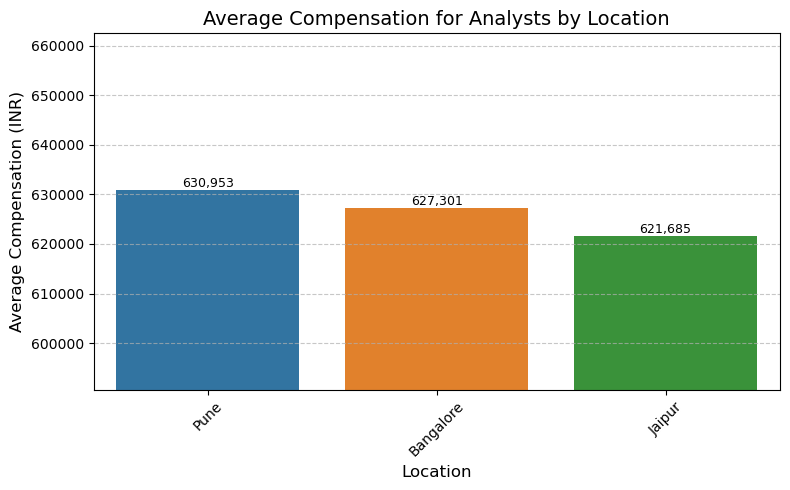

In [76]:


# Load data from database 
import sqlite3
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# Ensure consistent column naming
employee_df.columns = [col.strip().replace("?", "").replace(" ", "_") for col in employee_df.columns]

# Step 1: Filter Active Employees by Role
def filter_by_role(role, include_inactive=False):
    if include_inactive:
        filtered = employee_df[employee_df['Role'] == role]
    else:
        filtered = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return filtered[['Name', 'Role', 'Location', 'CurrentCompINR', 'Last_Working_Day']]

# Step 2: Calculate Average Compensation by Location for Selected Role
def avg_comp_by_location(role):
    data = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return data.groupby('Location')['CurrentCompINR'].mean().reset_index()

# Step 3: Bar Chart Comparing Compensation Across Locations
def plot_comp_chart(role):
    avg_comp = avg_comp_by_location(role)
    
    # Sort for better visual comparison
    avg_comp = avg_comp.sort_values(by='CurrentCompINR', ascending=False)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=avg_comp, x='Location', y='CurrentCompINR')
    
    # Add value labels (numbers) on top of each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Dynamically adjust Y-axis for better visual differences
    min_val = avg_comp['CurrentCompINR'].min()
    max_val = avg_comp['CurrentCompINR'].max()
    plt.ylim(min_val * 0.95, max_val * 1.05)

    # for Polished Presentation
    plt.title(f"Average Compensation for {role}s by Location", fontsize=14)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Average Compensation (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the chart automatically
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig(f"results/US1_AvgComp_{role}.png")
    
    plt.show()


# Outcome Usage:
role_input = "Analyst"  # You can change to 'Senior Analyst', 'Associate', etc.

print("📄 Filtered Data:")
display(filter_by_role(role_input, include_inactive=False))  # Set True to include inactive employees

print("\n📊 Plotting Average Compensation...")
plot_comp_chart(role_input)



📄 Filtered Data:


,Name,Role,Location,CurrentCompINR,Last_Working_Day
1,Pooja Kaur,Senior Analyst,Bangalore,798703.0,Currently Active
8,Himanshu Dhillon,Senior Analyst,Pune,895396.0,Currently Active
9,Hetal Bhatia,Senior Analyst,Pune,820895.0,Currently Active
16,Arvind Sinha,Senior Analyst,Jaipur,734868.0,Currently Active
22,Om Sinha,Senior Analyst,Bangalore,846412.0,Currently Active
38,Nirmala Verma,Senior Analyst,Bangalore,839893.0,Currently Active
40,Praveen Joshi,Senior Analyst,Bangalore,839782.0,Currently Active
49,Nila Patel,Senior Analyst,Bangalore,748140.0,Currently Active
50,Bhanu Kapoor,Senior Analyst,Jaipur,842482.0,Currently Active
52,Poornima Mehta,Senior Analyst,Bangalore,738224.0,Currently Active



📊 Plotting Average Compensation...


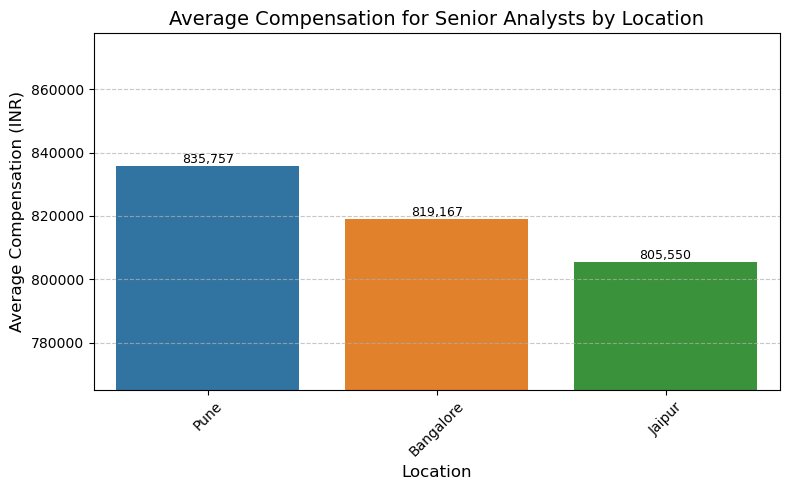

In [75]:


# Load data from database (optional if already in memory)
import sqlite3
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# Ensure consistent column naming
employee_df.columns = [col.strip().replace("?", "").replace(" ", "_") for col in employee_df.columns]

# Step 1: Filter Active Employees by Role
def filter_by_role(role, include_inactive=False):
    if include_inactive:
        filtered = employee_df[employee_df['Role'] == role]
    else:
        filtered = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return filtered[['Name', 'Role', 'Location', 'CurrentCompINR', 'Last_Working_Day']]

# Step 2: Calculate Average Compensation by Location for Selected Role
def avg_comp_by_location(role):
    data = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return data.groupby('Location')['CurrentCompINR'].mean().reset_index()

# Step 3: Bar Chart Comparing Compensation Across Locations
def plot_comp_chart(role):
    avg_comp = avg_comp_by_location(role)
    
    # Sort for better visual comparison
    avg_comp = avg_comp.sort_values(by='CurrentCompINR', ascending=False)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=avg_comp, x='Location', y='CurrentCompINR')
    
    # Add value labels (numbers) on top of each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Dynamically adjust Y-axis for better visual differences
    min_val = avg_comp['CurrentCompINR'].min()
    max_val = avg_comp['CurrentCompINR'].max()
    plt.ylim(min_val * 0.95, max_val * 1.05)

    # Polished Presentation
    plt.title(f"Average Compensation for {role}s by Location", fontsize=14)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Average Compensation (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the chart automatically
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig(f"results/US1_AvgComp_{role}.png")
    
    plt.show()



role_input = "Senior Analyst"

print("📄 Filtered Data:")
display(filter_by_role(role_input, include_inactive=False))  # Set True to include inactive employees

print("\n📊 Plotting Average Compensation...")
plot_comp_chart(role_input)



📄 Filtered Data:


,Name,Role,Location,CurrentCompINR,Last_Working_Day
4,Bilal Kulkarni,Associate,Jaipur,976125.0,Currently Active
20,Rajeshwari Joshi,Associate,Bangalore,1180331.0,Currently Active
21,Damodar Kumar,Associate,Jaipur,910994.0,Currently Active
29,Chhavi Mehta,Associate,Jaipur,1032250.0,Currently Active
42,Prema Khanna,Associate,Bangalore,1254653.0,Currently Active
43,Pritha Sinha,Associate,Bangalore,1336002.0,Currently Active
46,Bindiya Pillai,Associate,Jaipur,1098051.0,Currently Active
54,Rajesh Kapoor,Associate,Bangalore,1264754.0,Currently Active
77,Indira Kumar,Associate,Pune,907115.0,Currently Active
82,Inderjit Patel,Associate,Pune,991402.0,Currently Active



📊 Plotting Average Compensation...


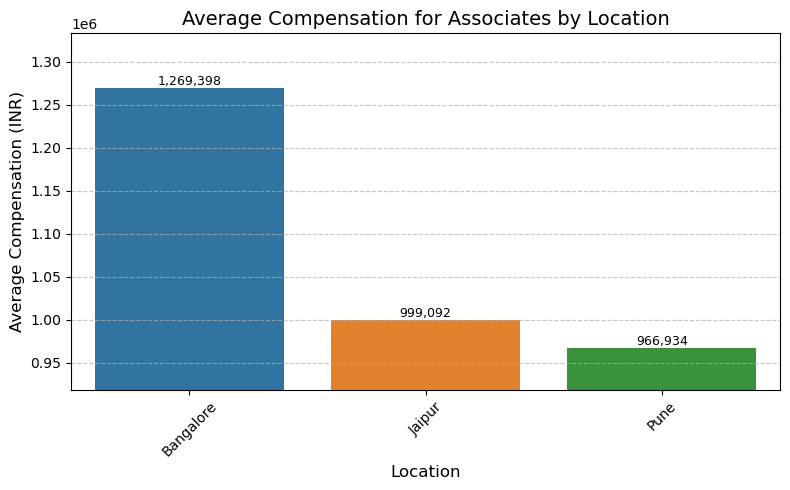

In [74]:


# Load data from database (optional if already in memory)
import sqlite3
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# Ensure consistent column naming
employee_df.columns = [col.strip().replace("?", "").replace(" ", "_") for col in employee_df.columns]

# Step 1: Filter Active Employees by Role
def filter_by_role(role, include_inactive=False):
    if include_inactive:
        filtered = employee_df[employee_df['Role'] == role]
    else:
        filtered = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return filtered[['Name', 'Role', 'Location', 'CurrentCompINR', 'Last_Working_Day']]

# Step 2: Calculate Average Compensation by Location for Selected Role
def avg_comp_by_location(role):
    data = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return data.groupby('Location')['CurrentCompINR'].mean().reset_index()

# Step 3: Bar Chart Comparing Compensation Across Locations
def plot_comp_chart(role):
    avg_comp = avg_comp_by_location(role)
    
    # Sort for better visual comparison
    avg_comp = avg_comp.sort_values(by='CurrentCompINR', ascending=False)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=avg_comp, x='Location', y='CurrentCompINR')
    
    # Add value labels (numbers) on top of each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Dynamically adjust Y-axis for better visual differences
    min_val = avg_comp['CurrentCompINR'].min()
    max_val = avg_comp['CurrentCompINR'].max()
    plt.ylim(min_val * 0.95, max_val * 1.05)

    # Polished Presentation
    plt.title(f"Average Compensation for {role}s by Location", fontsize=14)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Average Compensation (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the chart automatically
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig(f"results/US1_AvgComp_{role}.png")
    
    plt.show()



role_input = "Associate"

print("📄 Filtered Data:")
display(filter_by_role(role_input, include_inactive=False))  # Set True to include inactive employees

print("\n📊 Plotting Average Compensation...")
plot_comp_chart(role_input)



📄 Filtered Data:


,Name,Role,Location,CurrentCompINR,Last_Working_Day
83,Rani Khanna,Manager,Bangalore,3079338.0,Currently Active
125,Damini Verma,Manager,Jaipur,2910548.0,Currently Active
131,Rakesh Menon,Manager,Bangalore,3287201.0,Currently Active
155,Ranjana Sinha,Manager,Bangalore,2586435.0,Currently Active
272,Darshan Singh,Manager,Jaipur,3039209.0,Currently Active
289,Jaidev Khanna,Manager,Pune,2945176.0,Currently Active



📊 Plotting Average Compensation...


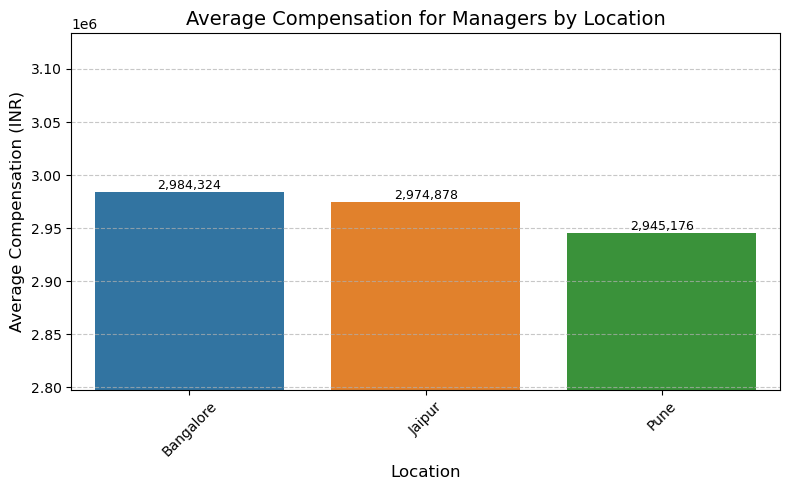

In [73]:


# Load data from database (optional if already in memory)
import sqlite3
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# Ensure consistent column naming
employee_df.columns = [col.strip().replace("?", "").replace(" ", "_") for col in employee_df.columns]

# Step 1: Filter Active Employees by Role
def filter_by_role(role, include_inactive=False):
    if include_inactive:
        filtered = employee_df[employee_df['Role'] == role]
    else:
        filtered = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return filtered[['Name', 'Role', 'Location', 'CurrentCompINR', 'Last_Working_Day']]

# Step 2: Calculate Average Compensation by Location for Selected Role
def avg_comp_by_location(role):
    data = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return data.groupby('Location')['CurrentCompINR'].mean().reset_index()

# Step 3: Bar Chart Comparing Compensation Across Locations
def plot_comp_chart(role):
    avg_comp = avg_comp_by_location(role)
    
    # Sort for better visual comparison
    avg_comp = avg_comp.sort_values(by='CurrentCompINR', ascending=False)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=avg_comp, x='Location', y='CurrentCompINR')
    
    # Add value labels (numbers) on top of each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Dynamically adjust Y-axis for better visual differences
    min_val = avg_comp['CurrentCompINR'].min()
    max_val = avg_comp['CurrentCompINR'].max()
    plt.ylim(min_val * 0.95, max_val * 1.05)

    # Polished Presentation
    plt.title(f"Average Compensation for {role}s by Location", fontsize=14)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Average Compensation (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the chart automatically
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig(f"results/US1_AvgComp_{role}.png")
    
    plt.show()



role_input = "Manager"

print("📄 Filtered Data:")
display(filter_by_role(role_input, include_inactive=False))  # Set True to include inactive employees

print("\n📊 Plotting Average Compensation...")
plot_comp_chart(role_input)



📄 Filtered Data:


,Name,Role,Location,CurrentCompINR,Last_Working_Day
13,Jai Menon,Senior Associate,Pune,1704253.000,Currently Active
18,Devi Menon,Senior Associate,Jaipur,1714061.250,Currently Active
27,Renu Gupta,Senior Associate,Bangalore,2291090.000,Currently Active
51,Deepali Joshi,Senior Associate,Jaipur,1324501.875,Currently Active
56,Reena Dhillon,Senior Associate,Bangalore,2452003.000,Currently Active
59,Devang Iyer,Senior Associate,Jaipur,1869885.000,Currently Active
60,Rati Rao,Senior Associate,Bangalore,1915774.000,Currently Active
66,Ravi Bhatia,Senior Associate,Bangalore,2007027.000,Currently Active
97,Ranjeet Kulkarni,Senior Associate,Bangalore,1744115.000,Currently Active
108,Jagadish Nair,Senior Associate,Pune,2119272.000,Currently Active



📊 Plotting Average Compensation...


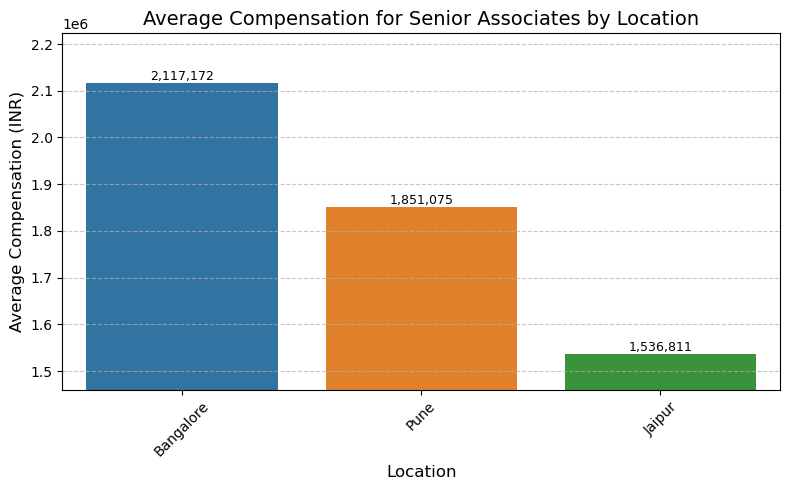

In [72]:


# Load data from database (optional if already in memory)
import sqlite3
conn = sqlite3.connect("database/techsolve.db")
employee_df = pd.read_sql_query("SELECT * FROM Employee", conn)

# Ensure consistent column naming
employee_df.columns = [col.strip().replace("?", "").replace(" ", "_") for col in employee_df.columns]

# Step 1: Filter Active Employees by Role
def filter_by_role(role, include_inactive=False):
    if include_inactive:
        filtered = employee_df[employee_df['Role'] == role]
    else:
        filtered = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return filtered[['Name', 'Role', 'Location', 'CurrentCompINR', 'Last_Working_Day']]

# Step 2: Calculate Average Compensation by Location for Selected Role
def avg_comp_by_location(role):
    data = employee_df[(employee_df['Role'] == role) & (employee_df['Active'] == 'Y')]
    return data.groupby('Location')['CurrentCompINR'].mean().reset_index()

# Step 3: Bar Chart Comparing Compensation Across Locations
def plot_comp_chart(role):
    avg_comp = avg_comp_by_location(role)
    
    # Sort for better visual comparison
    avg_comp = avg_comp.sort_values(by='CurrentCompINR', ascending=False)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=avg_comp, x='Location', y='CurrentCompINR')
    
    # Add value labels (numbers) on top of each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Dynamically adjust Y-axis for better visual differences
    min_val = avg_comp['CurrentCompINR'].min()
    max_val = avg_comp['CurrentCompINR'].max()
    plt.ylim(min_val * 0.95, max_val * 1.05)

    # Polished Presentation
    plt.title(f"Average Compensation for {role}s by Location", fontsize=14)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Average Compensation (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the chart automatically
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig(f"results/US1_AvgComp_{role}.png")
    
    plt.show()



role_input = "Senior Associate"

print("📄 Filtered Data:")
display(filter_by_role(role_input, include_inactive=False))  # Set True to include inactive employees

print("\n📊 Plotting Average Compensation...")
plot_comp_chart(role_input)

